Importing required libraries to predict acceleration using random forest, calculate RMSE (RootMeanSquaredError), and create plots to compare predicted and actual acceleration

In [8]:
import pandas as pd
import numpy as np
import FileProcessing
import ModelClass

In [9]:
file=FileProcessing.FileProcessing()
model_obj=ModelClass.ModelClass()

In [10]:
model_name='knn'

In [11]:
file_name='Plot_Pairs_NGSIM_Data'
trajectory_display=file.read_input(file_name)

File Read Complete: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data/Plot_Pairs_NGSIM_Data.csv


In [12]:
unique_vehicle_combinations=trajectory_display['Vehicle_combination'].unique()
print(unique_vehicle_combinations[0])
print(unique_vehicle_combinations[1])
print(unique_vehicle_combinations[2])

Car-Heavy Vehicle
Heavy Vehicle-Car
Car-Car


In [13]:
print(trajectory_display.groupby(['Vehicle_combination','L-F_Pair'])['Vehicle_ID'].nunique())

Vehicle_combination  L-F_Pair 
Car-Car              249-255      1
                     390-394      1
                     439-444      1
Car-Heavy Vehicle    2322-2330    1
                     2725-2717    1
                     2785-2804    1
Heavy Vehicle-Car    3084-3094    1
                     3193-3209    1
                     551-560      1
Name: Vehicle_ID, dtype: int64


In [14]:
delta_time=0.5
target_variable = 'nextframeAcc'
model =file.read_model(model_name,delta_time)
predict_data=model_obj.prediction_preprocessing(trajectory_display,delta_time)

Model Load Completed: c:\Users\StudentAccount\Python\Capstone\gitcodelocation\DataDrivenCarFollowing\datadrivencarfollowing-v1\data/knn0.5.pkg


In [15]:

predict_on_pair = model_obj.prediction_test_pairs(trajectory_display, 0, 11)
print(predict_on_pair[0])
print(predict_on_pair[1])
print(predict_on_pair[2])
print(predict_on_pair[3])
print(predict_on_pair[4])
print(predict_on_pair[5])
print(predict_on_pair[6])
print(predict_on_pair[7])
print(predict_on_pair[8])


2322-2330
551-560
249-255
390-394
2785-2804
3084-3094
3193-3209
439-444
2725-2717


In [16]:
predict_on_pair = model_obj.prediction_test_pairs(predict_data, 0, 11,unique_vehicle_combinations[0])
print(predict_on_pair)
print(predict_on_pair[0])
print(predict_on_pair[1])
print(predict_on_pair[2])

['2322-2330', '2785-2804', '2725-2717']
2322-2330
2785-2804
2725-2717


In [17]:
predicted_data = model_obj.prediction(predict_data, predict_on_pair, target_variable, model, delta_time)

In [18]:
predicted_data.columns

Index(['Local_Y', 'v_Class', 'v_Vel', 'v_Acc', 'Following', 'Location',
       'Rear_to_Front_Space_Headway',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'Vehicle_combination', 'preceding_vehicle_length',
       'preceding_Vehicle_Velocity', 'preceding_Vehicle_Acceleration',
       'preceding_Local_Y', 'preceding_v_Class', 'pair_Time_Duration',
       'nextframeAcc', 'nextframesvel', 'nextframeposition',
       'nextFrameSpacing', 'precnextframeposition', 'precnextframesvel',
       'predicted_acceleration', 'predicted_velocity', 'predicted_Local_Y',
       'predicted_spacing', 'preceding_Local_Y_used', 's_subject'],
      dtype='object')

In [19]:
predict_data.columns

Index(['Local_Y', 'v_Class', 'v_Vel', 'v_Acc', 'Following', 'Location',
       'Rear_to_Front_Space_Headway',
       'Velocity Difference_Following-Preceding',
       'Acceleration Difference_Following-Preceding', 'L-F_Pair',
       'Vehicle_combination', 'preceding_vehicle_length',
       'preceding_Vehicle_Velocity', 'preceding_Vehicle_Acceleration',
       'preceding_Local_Y', 'preceding_v_Class', 'pair_Time_Duration',
       'nextframeAcc', 'nextframesvel', 'nextframeposition',
       'nextFrameSpacing', 'precnextframeposition', 'precnextframesvel'],
      dtype='object')

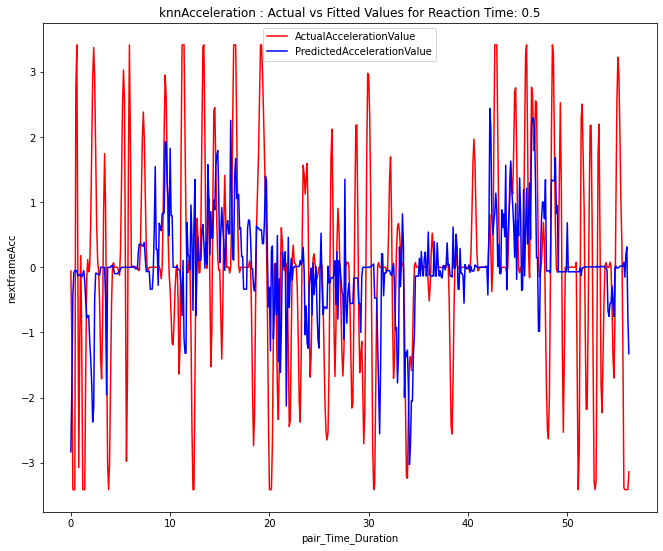

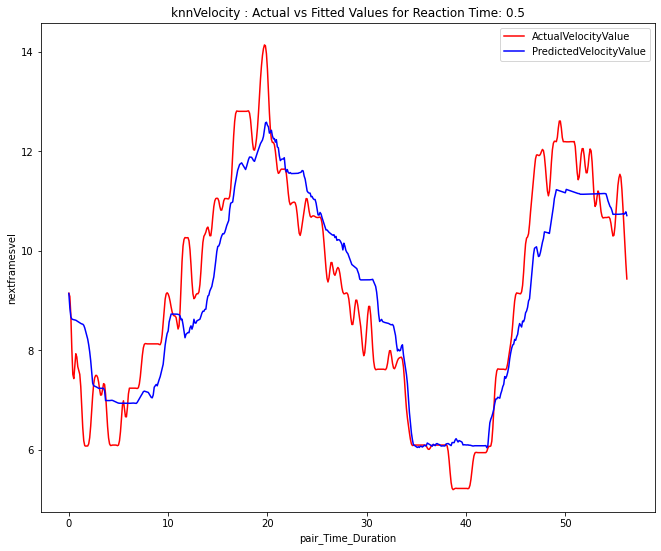

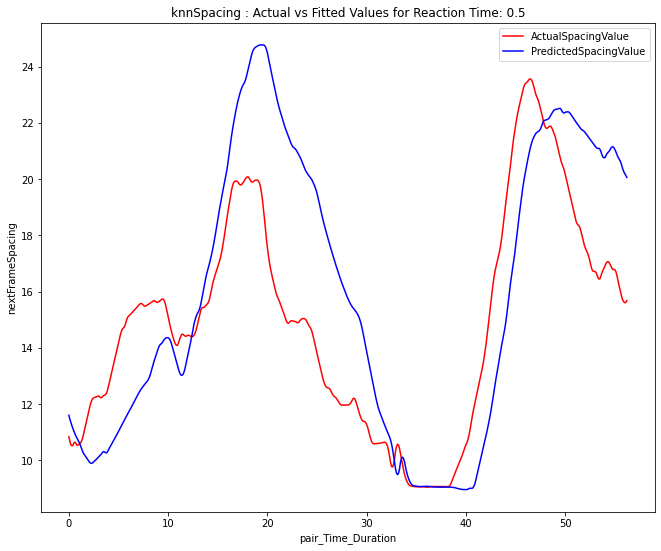

In [20]:
prediction_1 = predicted_data[predicted_data["L-F_Pair"]== predict_on_pair[0]]
model_obj.display_display_prediction_plots(prediction_1, delta_time, model_name)